# Problem #1

## System 1

In [2]:
import numpy as np

In [3]:
# Let's call the system S(). We have a vector 'a' and a vector 'b' defined as:
a = np.array([2, 4])
b = np.array([-1, -2])

In [5]:
# Note that a = -2b
assert np.array_equal(a, -2*b)

In [6]:
# We also know the outputs of the system S(a) and S(b)
S_a = np.array([-6, -6])
S_b = np.array([3, 3])

In [7]:
# Since a = -2b, then for the system to be linear, we must have that
# S(a) = -2S(b) by the principle of superposition. Let's check:
assert np.array_equal(S_a, -2*S_b)

Now let's find a matrix that could be associated with this system. 
We know by dimension rules that this must be a 2x2 matrix. Let's 
call it M:
             
            M =   [m_00, m_01]
                  [m_10, m_11]
                  
We know that Ma = [-6, -6]. So we have 2m_00 + 4m_01 = -6. We also know
that Mb = [3, 3], but this doesn't add any information because b is a
linear combination of a. So one possible solution is m_00 = -1 and 
m_01 = -1, but this is not unique because we have 2 variables and 1 
equality. We also have 2m_10 + 4m_11 = -6, which leads us to possible
values m_10 = -1, m_11 = -1. But these values are again not unique,
for the same reasoning. So we have
            
            M = [-1, -1]
                [-1, -1]
                
as a possible matrix for this system, but it is not unique (explained
above).

In [8]:
# Check that M works
M = np.array([[-1, -1], [-1, -1]])
assert np.array_equal(np.matmul(M, a), S_a)
assert np.array_equal(np.matmul(M, b), S_b)

## System 2

In [10]:
# Again we have 'a' and 'b'
a = 1
b = 2

In [11]:
# Note that b = 2a
assert b == 2*a

In [12]:
# Check whether S(b) = 2S(a)
S_a = np.array([1, 4])
S_b = np.array([2, 6])
assert np.array_equal(S_b, 2*S_a)

AssertionError: 

S(a) != 2S(b). So S() is not a linear system because it
does not follow the principle of superposition.

## System 3

In [13]:
# Now we have 3 vectors 'a,' 'b' and 'c'
a = np.array([1, 1])
b = np.array([1, -0.5])
c = np.array([3, 0])

In [14]:
# Note that c = a + 2b
assert np.array_equal(c, a + 2*b)

In [18]:
# Check whether S(c) = S(a) + 2S(b)
S_a = np.array([4, -1])
S_b = np.array([1, 3])
S_c = np.array([6, 2])
assert np.array_equal(S_c, S_a + 2*S_b)

AssertionError: 

S(c) != S(a) + 2S(b). So S() is not a linear system because it does not follow the principle of superposition.

## System 4

In [20]:
# we have 2 vectors 'a' and 'b'
a = np.asarray([2, 4])
b = np.asarray([-2, 2])

We can't use the superposition test here because we cannot 
write one vector as a linear combination of the others. But we 
know that the operator would have to be a 1x2 matrix M, so we can 
do some basic algebra:
            
            2m_00 + 4m_01 = 0  -->  m_00 = -2m_01
            -2m_00 + 2m_01 = 3  -->  -2(-2m_01) + 2m_01 = 3
            -->  6m_01 = 3  -->  m_01 = 0.5
            m_00 = -2(0.5) = -1
            
So the system is linear, because we have a 1x2 matrix M that satisfies
Ma = 0 and Mb = 3. This matrix is M = [-1, 0.5] and I believe it
is unique, because there was a unique solution when solving the
system of equations to find it.

In [21]:
# Check that M works
M = np.asarray([[-1, 0.5]])
# note: result of np.matmul(M, a) will be a 1-D vector, so we have to
# index to get the scalar
assert np.array_equal(np.matmul(M, a)[0], 0)
assert np.array_equal(np.matmul(M, b)[0], 3)

## System 5

This cannot be a linear system. In order for this to be a linear system,
we would need to find a matrix M such that M0 = [1,2]. But any matrix
multiplied by the scalar 0 will have a resulting matrix with entries
that are all zeros. So this cannot be a linear system.

# Problem #2

## Part (a)

In [24]:
%matplotlib inline
import matplotlib.pylab as plt

In [25]:
def plotVec2(matrix):
    assert matrix.shape[0] == 2, "Matrix must have height 2."
    plt.figure()
    # First, plot the axes
    plt.plot([-1, 1], [0, 0], c='black')
    plt.plot([0, 0], [-1, 1], c='black')
    # Randomly generate colors for each line. Colors are 3D vectors of
    # RGB values between 0-1.
    colors = np.random.uniform(size=(matrix.shape[1], 3))
    # Now cycle through the column vectors and plot each
    for i in range(matrix.shape[1]):
        x, y = matrix[:, i]
        plt.plot([0, x], [0, y], c=colors[i])
        plt.scatter([x], [y], c=colors[i])
    plt.show()

Matrix:
[[-0.22793528 -0.86182774  1.25302785 -0.24187543]
 [-0.77824956  0.21201271  0.88619778  1.33456451]]


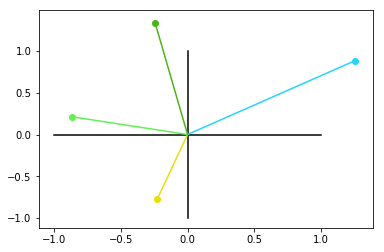

In [26]:
# Generate a random height-2 matrix and plot the columns using our
# function (code can be found above)
matrix = np.random.normal(size=(2, 4))
print('Matrix:')
print(matrix)
plotVec2(matrix)

## Part (b)

In [93]:
import math

def vecLenAngle(v1, v2, verbose=False):
    """
    Angles are returned in radians. If one or more of the vectors has 
    zero length, 'N/A' is returned for the angle.
    """
    # The magnitude is the sqrt of the sum of component squares
    mag1 = np.sqrt(np.sum(np.square(v1)))
    mag2 = np.sqrt(np.sum(np.square(v2)))
    # Dot product = mag1*mag2*cos(theta), where theta is the angle between v1
    # and v2. So theta = arccos(dot/(mag1*mag2))
    dot = np.sum(np.multiply(v1, v2))
    if mag1*mag2 == 0:
        theta = 'N/A'
    else:
        theta = math.degrees(np.arccos(dot/(mag1*mag2)))
        
    if verbose:
        print('Magnitude of vector 1: %0.2f' % mag1)
        print('Magnitude of vector 2: %0.2f' % mag2)
        if type(theta) == str:
            print('Angle N/A')
        else:
            print('Angle: %0.1f degrees' % theta)
    
    return mag1, mag2, theta

In [94]:
# Generate two random vectors and use our function to compute
# the magnitudes & lengths
v1 = np.random.normal(size=(2,))
v2 = np.random.normal(size=(2,))
print('Vector 1:')
print(v1)
print('Vector 2:')
print(v2)
mag1, mag2, theta = vecLenAngle(v1, v2, verbose=True)

Vector 1:
[ 0.85541596  0.10455275]
Vector 2:
[-0.2494765   2.08867937]
Magnitude of vector 1: 0.86
Magnitude of vector 2: 2.10
Angle: 89.8 degrees


## Part (c)

In [71]:
# generate a random matrix of size (2, 2)
matrix = np.random.normal(size=(2, 2))

In [105]:
# writing a wrapper for numpy's SVD because numpy returns singular values as an array (weird).
def svd(matrix):
    U, s, Vh = np.linalg.svd(matrix)
    S = np.zeros(matrix.shape, dtype=float)
    n = len(s)
    S[:len(s), :len(s)] = np.diag(s)
    return U, S, Vh

In [106]:
# decompose our matrix with SVD
U, S, Vh = svd(matrix)
print(U.shape)
print(S.shape)
print(Vh.shape)

(2, 2)
(2, 2)
(2, 2)


In [107]:
# define our basis vectors e1 and e2
e1 = np.array([1, 0])
e2 = np.array([0, 1])

In [108]:
# observe lengths and angle between e1 and e2
mag1, mag2, theta = vecLenAngle(e1, e2, verbose=True)

Magnitude of vector 1: 1.00
Magnitude of vector 2: 1.00
Angle: 90.0 degrees


In [109]:
# observe lengths and angle between Vhe1 and Vhe2
Vhe1 = np.matmul(Vh, e1)
Vhe2 = np.matmul(Vh, e2)
mag1, mag2, theta = vecLenAngle(Vhe1, Vhe2, verbose=True)

Magnitude of vector 1: 1.00
Magnitude of vector 2: 1.00
Angle: 90.0 degrees


In [110]:
# observe lengths and angle between SVhe1 and SVhe2
SVhe1 = np.matmul(S, Vhe1)
SVhe2 = np.matmul(S, Vhe2)
mag1, mag2, theta = vecLenAngle(SVhe1, SVhe2, verbose=True)

Magnitude of vector 1: 2.13
Magnitude of vector 2: 0.81
Angle: 78.2 degrees


In [111]:
# observe lengths and angle between USVhe1 and USVhe2
USVhe1 = np.matmul(U, SVhe1)
USVhe2 = np.matmul(U, SVhe2)
mag1, mag2, theta = vecLenAngle(USVhe1, USVhe2, verbose=True)

Magnitude of vector 1: 2.13
Magnitude of vector 2: 0.81
Angle: 78.2 degrees


The only time that the vector magnitudes and the angle between the two vectors changed was during the S transformation (SVhen). The other two transformations did not change the magnitudes or angle. This makes sense because the other two transformations involved orthogonal matrices, which perform rotation.

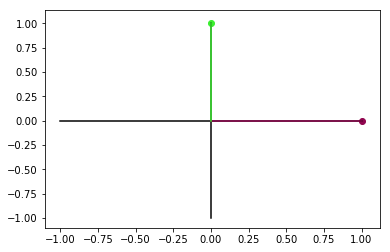

In [119]:
# first, plot e1 and e2
plotVec2(np.vstack((e1, e2)))

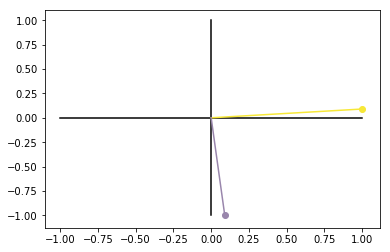

In [120]:
# next, plot Vhe1 and Vhe2. Notice that this is just a rotation
plotVec2(np.vstack((Vhe1, Vhe2)))

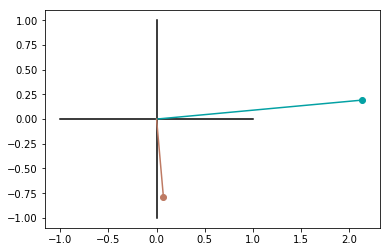

In [121]:
# next, plot SVhe1 and SVhe2. Here we actually change lengths and the angle.
plotVec2(np.vstack((SVhe1, SVhe2)))

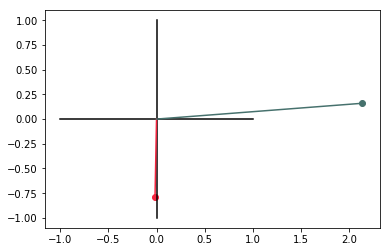

In [123]:
# next, plot USVhe1 and USVhe2. Notice that this is just a rotation.
plotVec2(np.vstack((USVhe1, USVhe2)))

## part (d)

In [140]:
# create theta vector
thetas = np.array([2*np.pi*n/64 for n in range(65)])
P = np.hstack([[[np.cos(theta)], [np.sin(theta)]] for theta in thetas])